<a href="https://colab.research.google.com/github/DivyaDileep2210/Projects/blob/main/int_covidXray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test_dataset=test.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 271 images belonging to 3 classes.
Found 65 images belonging to 3 classes.
Found 40 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(224,224,3)))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dense(4,activation='relu'))
cnn_model.add(Dense(1,activation='sigmoid'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
alex_model=Sequential()
alex_model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(224,224,3)))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Flatten())
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(1,activation='sigmoid'))

alex_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)      

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
cnn_model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
alex_model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
cnn_his = cnn_model.fit(train_dataset,batch_size=32,epochs=30,validation_data=valid_dataset)

Epoch 1/30
9/9 [==============================] - 95s 10s/step - loss: -1938.4105 - accuracy: 0.2177 - val_loss: -1368.4541 - val_accuracy: 0.2154
Epoch 2/30
9/9 [==============================] - 11s 1s/step - loss: -276667.3750 - accuracy: 0.2214 - val_loss: -215930.7656 - val_accuracy: 0.2154
Epoch 3/30
9/9 [==============================] - 10s 1s/step - loss: -13603166.0000 - accuracy: 0.2214 - val_loss: -6624021.5000 - val_accuracy: 0.2154
Epoch 4/30
9/9 [==============================] - 10s 1s/step - loss: -303508416.0000 - accuracy: 0.2214 - val_loss: -117206696.0000 - val_accuracy: 0.2154
Epoch 5/30
9/9 [==============================] - 10s 1s/step - loss: -3424678144.0000 - accuracy: 0.2214 - val_loss: -1215313408.0000 - val_accuracy: 0.2154
Epoch 6/30
9/9 [==============================] - 10s 1s/step - loss: -32928010240.0000 - accuracy: 0.2214 - val_loss: -9312432128.0000 - val_accuracy: 0.2154
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: -204994

In [ ]:
alex_his=alex_model.fit(train_dataset,batch_size=32,epochs=20,validation_data=valid_dataset)

Epoch 1/20
9/9 [==============================] - 12s 1s/step - loss: -4060527.5000 - accuracy: 0.2288 - val_loss: -50278140.0000 - val_accuracy: 0.2154
Epoch 2/20
9/9 [==============================] - 10s 1s/step - loss: -2635127040.0000 - accuracy: 0.2214 - val_loss: -19165231104.0000 - val_accuracy: 0.2154
Epoch 3/20
9/9 [==============================] - 10s 1s/step - loss: -168978432000.0000 - accuracy: 0.2214 - val_loss: -904803647488.0000 - val_accuracy: 0.2154
Epoch 4/20
9/9 [==============================] - 10s 1s/step - loss: -4337771479040.0000 - accuracy: 0.2214 - val_loss: -17969304305664.0000 - val_accuracy: 0.2154
Epoch 5/20
9/9 [==============================] - 10s 1s/step - loss: -56333302759424.0000 - accuracy: 0.2214 - val_loss: -227562080960512.0000 - val_accuracy: 0.2154
Epoch 6/20
9/9 [==============================] - 11s 1s/step - loss: -659563497914368.0000 - accuracy: 0.2214 - val_loss: -1848211400556544.0000 - val_accuracy: 0.2154
Epoch 7/20
9/9 [=========

In [ ]:
cnn_model.evaluate(test_dataset)

2/2 [==============================] - 3s 2s/step - loss: 3139902293474803712.0000 - accuracy: 0.5000


[3.1399022934748037e+18, 0.5]

In [ ]:
alex_model.evaluate(test_dataset)

2/2 [==============================] - 1s 324ms/step - loss: 3560239339149476233216.0000 - accuracy: 0.5000


[3.560239339149476e+21, 0.5]

Text(0.5, 1.0, 'Training and validation loss of CNN Model in Covid X-RAY Dataset')

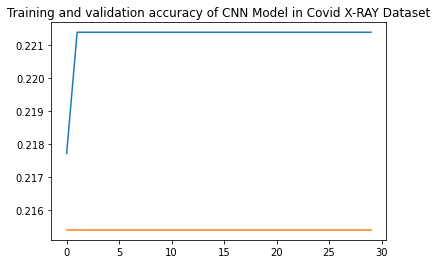

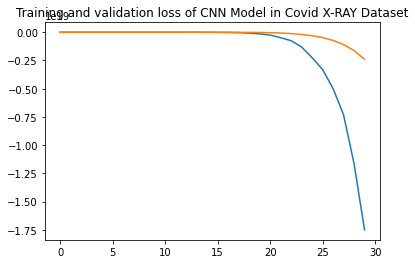

In [ ]:
from matplotlib import pyplot as plt
acc = cnn_his.history['accuracy']
val_acc = cnn_his.history['val_accuracy']

loss = cnn_his.history['loss']
val_loss = cnn_his.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of CNN Model in Covid X-RAY Dataset')

plt.figure()


plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of CNN Model in Covid X-RAY Dataset')

Text(0.5, 1.0, 'Training and validation loss of Alexnet Model in Covid X-RAY Dataset')

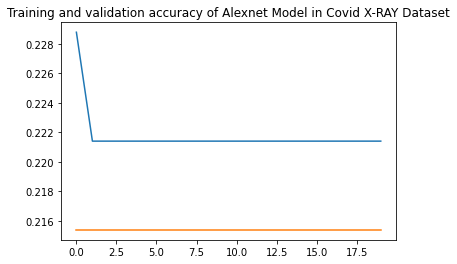

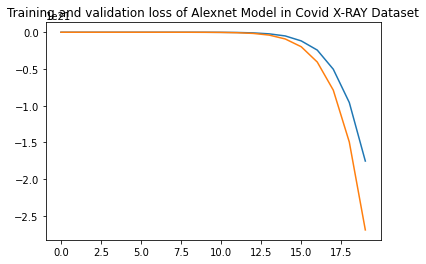

In [ ]:
acc = alex_his.history['accuracy']
val_acc = alex_his.history['val_accuracy']

loss = alex_his.history['loss']
val_loss = alex_his.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of Alexnet Model in Covid X-RAY Dataset')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of Alexnet Model in Covid X-RAY Dataset')